Setup

In [1]:
# Change working directory to project root
import os
os.chdir("C:/Users/saksh/Downloads/Cyberattack-Detection-ML")

# Add the 'scripts' directory to the system path
import sys
scripts_path = os.path.abspath("scripts")
if scripts_path not in sys.path:
    sys.path.append(scripts_path)

# Now import functions from preprocess.py
from preprocess import load_and_merge_csv, clean_and_select_features

Import Required Libraries

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

Load and Preprocess the Data

In [3]:
df = load_and_merge_csv("data")
X, y = clean_and_select_features(df)

Filter rare classes (fewer than 50 samples)

In [4]:
min_class_size = 50
class_counts = y.value_counts()
valid_classes = class_counts[class_counts >= min_class_size].index
X_filtered = X[y.isin(valid_classes)]
y_filtered = y[y.isin(valid_classes)]

Use a smaller sample for SVM (for speed)

In [5]:
X_small, _, y_small, _ = train_test_split(
    X_filtered, y_filtered, train_size=100000, stratify=y_filtered, random_state=42
)

Train/test split

In [6]:
X_train, X_test, y_train, y_test = train_test_split(
    X_small, y_small, test_size=0.2, random_state=42, stratify=y_small
)

Train the SVM Model

In [7]:
model = SVC(kernel='rbf', C=1, gamma='scale')
model.fit(X_train, y_train)

SVC(C=1)

Predict and Evaluate

In [8]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy Score:", accuracy)
print("\nClassification Report:\n", report)

Accuracy Score: 0.8408

Classification Report:
                           precision    recall  f1-score   support

                  BENIGN       0.85      0.99      0.91     16064
                     Bot       0.00      0.00      0.00        14
                    DDoS       0.00      0.00      0.00       905
           DoS GoldenEye       0.00      0.00      0.00        73
                DoS Hulk       0.72      0.60      0.65      1628
        DoS Slowhttptest       0.00      0.00      0.00        39
           DoS slowloris       0.00      0.00      0.00        41
             FTP-Patator       0.00      0.00      0.00        56
                PortScan       0.00      0.00      0.00      1123
             SSH-Patator       0.00      0.00      0.00        42
Web Attack � Brute Force       0.00      0.00      0.00        11
        Web Attack � XSS       0.00      0.00      0.00         4

                accuracy                           0.84     20000
               macro avg  

c:\Users\saksh\Downloads\Cyberattack-Detection-ML\env\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\saksh\Downloads\Cyberattack-Detection-ML\env\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\saksh\Downloads\Cyberattack-Detection-ML\env\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

Plot heatmap of confusion matrix

In [10]:
from sklearn.metrics import confusion_matrix

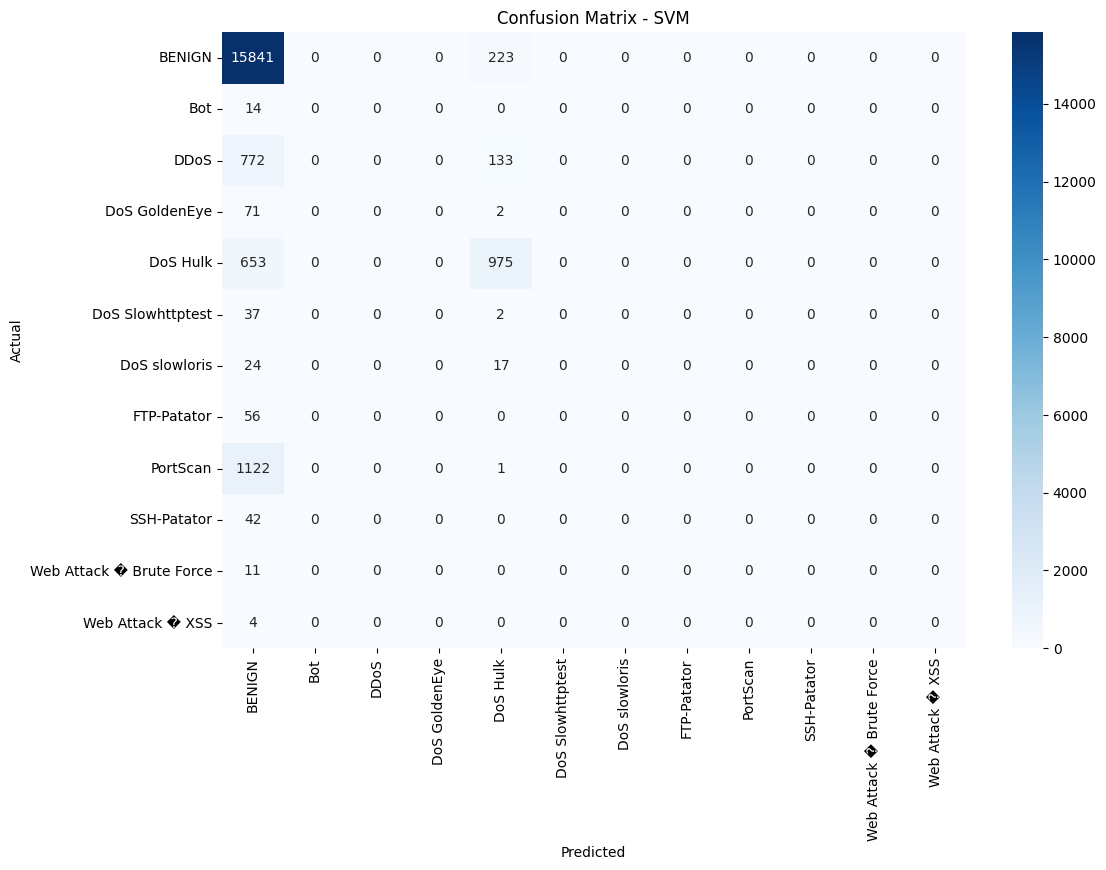

In [11]:
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
plt.figure(figsize=(12, 8))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=model.classes_, yticklabels=model.classes_, cmap="Blues")
plt.title("Confusion Matrix - SVM")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [13]:
import joblib


In [14]:
joblib.dump(model, "C:/Users/saksh/Downloads/Cyberattack-Detection-ML/models/svm_model.pkl")


['C:/Users/saksh/Downloads/Cyberattack-Detection-ML/models/svm_model.pkl']